In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv (r'dataset/survey.csv')

In [6]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [8]:
df.treatment

0       Yes
1        No
2        No
3       Yes
4        No
       ... 
1254    Yes
1255    Yes
1256    Yes
1257     No
1258    Yes
Name: treatment, Length: 1259, dtype: object

Seeing the amount of null values per column

In [9]:
df.treatment.unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [11]:
df.shape

(1259, 27)

In [12]:
print('Timestamp => ', df['Timestamp'].unique())
print('Age => ', df['Age'].unique())
print('Gender => ', df['Gender'].unique())
print('Country => ', df['Country'].unique())
print('self_employed => ', df['self_employed'].unique())
print('family_history => ', df['family_history'].unique())
print('treatment => ', df['treatment'].unique())
print('work_interfere => ', df['work_interfere'].unique())
print('no_employees => ', df['no_employees'].unique())
print('remote_work => ', df['remote_work'].unique())
print('tech_company => ', df['tech_company'].unique())
print('benefits => ', df['benefits'].unique())
print('care_options => ', df['care_options'].unique())
print('wellness_program => ', df['wellness_program'].unique())
print('seek_help => ', df['seek_help'].unique())
print('anonymity => ', df['anonymity'].unique())
print('leave => ', df['leave'].unique())
print('mental_health_consequence => ', df['mental_health_consequence'].unique())
print('phys_health_consequence => ', df['phys_health_consequence'].unique())
print('coworkers => ', df['coworkers'].unique())
print('supervisor => ', df['supervisor'].unique())
print('mental_health_interview => ', df['mental_health_interview'].unique())
print('phys_health_interview => ', df['phys_health_interview'].unique())
print('mental_vs_physical => ', df['mental_vs_physical'].unique())
print('obs_consequence => ', df['obs_consequence'].unique())

Timestamp =>  ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
Age =>  [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Gender =>  ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-

Changes null value by mode

In [13]:
df["self_employed"].fillna(df["self_employed"].mode()[0], inplace = True)
df["work_interfere"].fillna(df["work_interfere"].mode()[0], inplace = True)

df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                   0
family_history                  0
treatment                       0
work_interfere                  0
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

Getting rid of useless columns

In [14]:
df.drop('Timestamp', 1, inplace = True)
df.drop('state', 1, inplace = True)
df.drop('comments', 1, inplace = True)
df.drop('Country', 1, inplace = True)

df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

Check genders.

In [15]:
df.Gender =  df.Gender.str.upper().str.strip()

df.Gender.unique()

array(['FEMALE', 'M', 'MALE', 'MALE-ISH', 'MAILE', 'TRANS-FEMALE',
       'CIS FEMALE', 'F', 'SOMETHING KINDA MALE?', 'CIS MALE', 'WOMAN',
       'MAL', 'MALE (CIS)', 'QUEER/SHE/THEY', 'NON-BINARY', 'FEMAKE',
       'MAKE', 'NAH', 'ALL', 'ENBY', 'FLUID', 'GENDERQUEER', 'ANDROGYNE',
       'AGENDER', 'CIS-FEMALE/FEMME', 'GUY (-ISH) ^_^',
       'MALE LEANING ANDROGYNOUS', 'MAN', 'TRANS WOMAN', 'MSLE', 'NEUTER',
       'FEMALE (TRANS)', 'QUEER', 'FEMALE (CIS)', 'MAIL',
       'A LITTLE ABOUT YOU', 'MALR', 'P', 'FEMAIL', 'CIS MAN',
       'OSTENSIBLY MALE, UNSURE WHAT THAT REALLY MEANS'], dtype=object)

Reducing genders into 3 categories (F/M/O)

In [16]:
female_identifiers = ['FEMALE', 'CIS FEMALE', 'F', 'WOMAN', 'FEMAKE', 
                      'CIS-FEMALE/FEMME', 'FEMALE (CIS)', 'FEMAIL']
male_identifiers = ['M', 'MALE', 'MAILE', 'CIS MALE', 'MAL', 'MALE (CIS)', 
                    'MAKE', 'MAN', 'MSLE', 'MAIL', 'MALR', 'CIS MAN', 
                    'OSTENSIBLY MALE, UNSURE WHAT THAT REALLY MEANS']

female_filter = df.Gender.isin(female_identifiers)
male_filter = df.Gender.isin(male_identifiers)

df.loc[female_filter, 'Gender'] = 'F'
df.loc[male_filter, 'Gender'] = 'M'

other_filter = ~df.Gender.isin(['M', 'F'])
df.loc[other_filter, 'Gender'] = 'O'

Replace invalid ages (not between 17 and 72) with the valid age mean.

In [17]:
invalid_age_filter = ~df.Age.between(17, 72)
valid_age_mean = int(np.trunc(df[~invalid_age_filter].Age.mean())) 
df.loc[invalid_age_filter, 'Age'] = valid_age_mean

Since "Age" column has a huge range of values compared to the other columns, the scalling is performed using min-max method.

In [18]:
scaler = MinMaxScaler()
df.Age = scaler.fit_transform(df[['Age']])
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.351852,F,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,0.481481,M,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,0.259259,M,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,0.240741,M,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,0.240741,M,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Encodes string binary value to integer

In [19]:
label_encoder = LabelEncoder()
df.self_employed = label_encoder.fit_transform(df.self_employed)
df.family_history = label_encoder.fit_transform(df.family_history)
df.treatment = label_encoder.fit_transform(df.treatment)
df.remote_work = label_encoder.fit_transform(df.remote_work)
df.tech_company = label_encoder.fit_transform(df.tech_company)
df.obs_consequence = label_encoder.fit_transform(df.obs_consequence)

In [20]:
df = pd.concat([df, pd.get_dummies(df['mental_vs_physical'], prefix='mental_vs_physical')], axis=1)
df = pd.concat([df, pd.get_dummies(df['phys_health_interview'], prefix='phys_health_interview')], axis=1)
df = pd.concat([df, pd.get_dummies(df['mental_health_interview'], prefix='mental_health_interview')], axis=1)
df = pd.concat([df, pd.get_dummies(df['supervisor'], prefix='supervisor')], axis=1)
df = pd.concat([df, pd.get_dummies(df['coworkers'], prefix='coworkers')], axis=1)
df = pd.concat([df, pd.get_dummies(df['phys_health_consequence'], prefix='phys_health_consequence')], axis=1)
df = pd.concat([df, pd.get_dummies(df['leave'], prefix='leave')], axis=1)
df = pd.concat([df, pd.get_dummies(df['anonymity'], prefix='anonymity')], axis=1)
df = pd.concat([df, pd.get_dummies(df['seek_help'], prefix='seek_help')], axis=1)
df = pd.concat([df, pd.get_dummies(df['wellness_program'], prefix='wellness_program')], axis=1)
df = pd.concat([df, pd.get_dummies(df['care_options'], prefix='care_options')], axis=1)
df = pd.concat([df, pd.get_dummies(df['benefits'], prefix='benefits')], axis=1)
df = pd.concat([df, pd.get_dummies(df['no_employees'], prefix='no_employees')], axis=1)
df = pd.concat([df, pd.get_dummies(df['work_interfere'], prefix='work_interfere')], axis=1)
df = pd.concat([df, pd.get_dummies(df['mental_health_consequence'], prefix='mental_health_consequence')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Gender'], prefix='gender')], axis=1)
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,gender_F,gender_M,gender_O
0,0.351852,F,0,0,1,Often,6-25,0,1,Yes,...,0,1,0,0,0,1,0,1,0,0
1,0.481481,M,0,0,0,Rarely,More than 1000,0,0,Don't know,...,0,0,1,0,1,0,0,0,1,0
2,0.259259,M,0,0,0,Rarely,6-25,0,1,No,...,0,0,1,0,0,1,0,0,1,0
3,0.240741,M,0,1,1,Often,26-100,0,1,No,...,0,1,0,0,0,0,1,0,1,0
4,0.240741,M,0,0,0,Never,100-500,1,1,Yes,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.148148,M,0,0,1,Sometimes,26-100,0,1,No,...,0,0,0,1,0,1,0,0,1,0
1255,0.259259,M,0,1,1,Often,26-100,1,1,Yes,...,0,1,0,0,0,1,0,0,1,0
1256,0.296296,M,0,1,1,Sometimes,More than 1000,0,1,Yes,...,0,0,0,1,0,0,1,0,1,0
1257,0.518519,F,0,0,0,Sometimes,100-500,1,1,No,...,0,0,0,1,0,0,1,1,0,0


Applys one hot encode

In [21]:
df.drop(['mental_vs_physical'], axis='columns', inplace = True)
df.drop(['phys_health_interview'], axis='columns', inplace = True)
df.drop(['mental_health_interview'], axis='columns', inplace = True)
df.drop(['supervisor'], axis='columns', inplace = True)
df.drop(['coworkers'], axis='columns', inplace = True)
df.drop(['phys_health_consequence'], axis='columns', inplace = True)
df.drop(['leave'], axis='columns', inplace = True)
df.drop(['anonymity'], axis='columns', inplace = True)
df.drop(['seek_help'], axis='columns', inplace = True)
df.drop(['wellness_program'] , axis='columns', inplace = True)
df.drop(['care_options'], axis='columns', inplace = True)
df.drop(['benefits'], axis='columns', inplace = True)
df.drop(['no_employees'], axis='columns', inplace = True)
df.drop(['work_interfere'], axis='columns', inplace = True)
df.drop(['mental_health_consequence'], axis='columns', inplace = True)
df.drop(['Gender'], axis='columns', inplace = True)
df.shape

(1259, 61)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1259 non-null   float64
 1   self_employed                    1259 non-null   int64  
 2   family_history                   1259 non-null   int64  
 3   treatment                        1259 non-null   int64  
 4   remote_work                      1259 non-null   int64  
 5   tech_company                     1259 non-null   int64  
 6   obs_consequence                  1259 non-null   int64  
 7   mental_vs_physical_Don't know    1259 non-null   uint8  
 8   mental_vs_physical_No            1259 non-null   uint8  
 9   mental_vs_physical_Yes           1259 non-null   uint8  
 10  phys_health_interview_Maybe      1259 non-null   uint8  
 11  phys_health_interview_No         1259 non-null   uint8  
 12  phys_health_intervie

Find by Principal Component Analysis

In [23]:
pca = PCA(0.95)
df_pca = pca.fit_transform(df)
pd.DataFrame(df_pca)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.635125,-0.005687,-0.175467,-0.302101,-0.238508,0.389605,-0.169543,0.315247,0.308305,-0.549935,...,1.021811,0.240208,0.841210,0.140294,-0.156325,-0.198743,0.039192,0.409966,-0.293242,0.646290
1,-1.064617,0.037714,1.750934,1.006387,0.588511,-0.815209,-0.164182,0.107084,0.075363,0.380574,...,-0.746171,0.244465,-0.604550,0.322009,0.361332,0.147604,0.209587,0.375097,0.191626,0.076214
2,0.041743,-1.451447,-1.403379,0.581019,0.421972,-0.170497,-0.320472,-0.001929,1.055629,0.834218,...,0.100555,0.816665,-0.477456,-0.684175,0.042121,0.431225,0.048244,-0.083175,0.270964,0.232103
3,-0.439692,0.805737,-1.840290,0.237113,-1.280015,0.638343,-0.216706,0.229989,0.914962,-0.359011,...,-0.821282,-0.019782,0.564794,0.079862,0.546183,0.190116,-0.293970,0.462105,-0.295500,-0.126092
4,0.481090,-1.282450,1.221788,0.227292,0.142914,-0.497744,-0.334438,0.317913,0.624130,0.459079,...,0.825332,-0.348209,-0.277747,-0.059217,-0.481345,0.233165,-0.241185,0.266427,0.101174,-0.014539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,-0.558106,-0.593279,-0.508923,-0.984060,1.041747,-0.118593,0.353670,-0.359786,0.146221,-0.561927,...,-0.013963,0.213212,0.359738,0.035759,-0.257309,-0.211265,-0.205904,-0.126824,-0.086527,-0.054809
1255,1.434996,0.295599,-0.898015,-0.295329,0.902818,0.503145,-0.297722,0.033398,0.518266,-0.615084,...,0.224855,-0.054880,0.086638,0.476917,0.088110,0.277655,-0.363172,0.879453,0.429478,0.022569
1256,-0.667858,1.745963,-0.650456,1.137286,0.326189,0.414373,-0.016510,-0.597881,0.259480,-0.072351,...,-0.496735,-0.328593,-0.054565,-0.130160,0.139006,0.354477,-0.384952,-0.024026,0.672888,0.098719
1257,-1.059201,0.856295,-0.733437,0.938246,0.750949,0.360832,0.146902,-0.184765,-0.039268,-0.650334,...,-0.181605,0.069104,-0.001945,0.277285,0.071697,-0.646004,-0.391920,0.107407,-0.023129,-0.253355


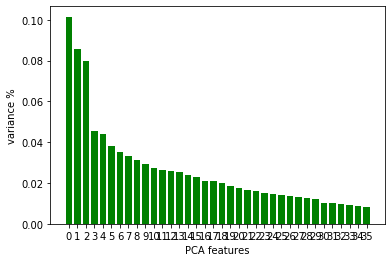

In [24]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

In [25]:
pd.DataFrame(pca.components_,columns=df.columns)

,Age,self_employed,family_history,treatment,remote_work,tech_company,obs_consequence,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,...,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,gender_F,gender_M,gender_O
0,0.009225,0.026738,0.039680,0.073821,0.011528,-0.001011,-0.016560,-0.158365,-0.102357,0.260722,...,-0.005424,0.006687,0.029661,-0.030924,-0.119877,0.270539,-0.150663,0.008568,-0.013321,0.004752
1,0.022218,-0.026073,0.150038,0.212956,-0.052935,-0.089646,0.107476,-0.071551,0.148044,-0.076492,...,-0.072386,0.033918,0.043450,-0.004982,0.108831,-0.290343,0.181512,0.135633,-0.150602,0.014969
2,0.003608,-0.103570,-0.031207,-0.082541,-0.065588,-0.040982,-0.068521,0.209104,-0.163299,-0.045805,...,0.067708,-0.061287,0.002183,-0.008604,0.104677,-0.006778,-0.097898,0.045266,-0.036397,-0.008869
3,0.007975,0.001240,-0.036709,-0.072000,0.025840,-0.015943,-0.002243,-0.112437,0.061612,0.050825,...,0.054419,-0.006390,0.017642,-0.065671,-0.387212,0.109750,0.277462,-0.062062,0.059077,0.002985
4,-0.005265,0.004166,0.042343,0.019647,0.000575,0.041035,-0.076954,0.172260,-0.189261,0.017001,...,-0.011628,-0.013993,0.043078,-0.017457,-0.030049,0.131416,-0.101368,0.089162,-0.085477,-0.003685
5,-0.020176,0.041006,0.374943,0.373209,0.116781,0.015674,0.091341,-0.218130,0.163268,0.054863,...,-0.216334,0.065926,-0.015424,0.165832,-0.137330,0.059818,0.077512,0.281089,-0.302551,0.021462
6,0.001770,0.130106,-0.237622,-0.304678,0.078440,0.014206,0.039470,-0.270158,0.070475,0.199682,...,0.063782,-0.103511,-0.125480,0.165209,-0.141869,0.051594,0.090275,-0.072408,0.071954,0.000453
7,0.011747,0.170593,-0.010233,0.052910,0.265910,0.087093,-0.028149,0.204601,-0.244428,0.039828,...,0.209024,0.145856,0.161194,-0.516074,0.065423,-0.053858,-0.011565,0.126886,-0.137407,0.010522
8,0.002559,-0.093165,-0.024767,-0.020811,-0.189326,-0.085965,0.109436,-0.267599,0.322073,-0.054474,...,0.270980,0.142768,0.152848,-0.566596,-0.179598,0.076584,0.103014,-0.054863,0.048534,0.006328
9,0.021029,-0.007445,0.141928,0.074700,0.008663,-0.075586,0.054134,-0.228239,0.075034,0.153204,...,-0.032911,0.009614,0.025317,-0.002020,0.206974,-0.134823,-0.072152,-0.034327,0.034246,0.000081


In [34]:
df.to_csv(r'outputs/cleaned_survey.csv')

In [35]:
df_copy = df[['Age', 'self_employed', 'family_history']]
df_copy.reset_index(drop=True, inplace=True)
df_copy
df_copy.to_csv(r'outputs/cleaned_survey_2.csv')